<a href="https://colab.research.google.com/github/LeelaNandhaKishore1511/RL-Lab-Sem-5/blob/main/RL_EXPT_LAB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Algorithm Results after 1000 Rounds (All Arms p=0.5) ---

--- Upper Confidence Bound (UCB) Results ---
- Video Lectures: Selected 517 times
- Interactive Quizzes: Selected 292 times
- Gamified Modules: Selected 191 times
Total Reward: 503

--- Thompson Sampling Results ---
- Video Lectures: Selected 493 times
- Interactive Quizzes: Selected 440 times
- Gamified Modules: Selected 67 times
Total Reward: 550



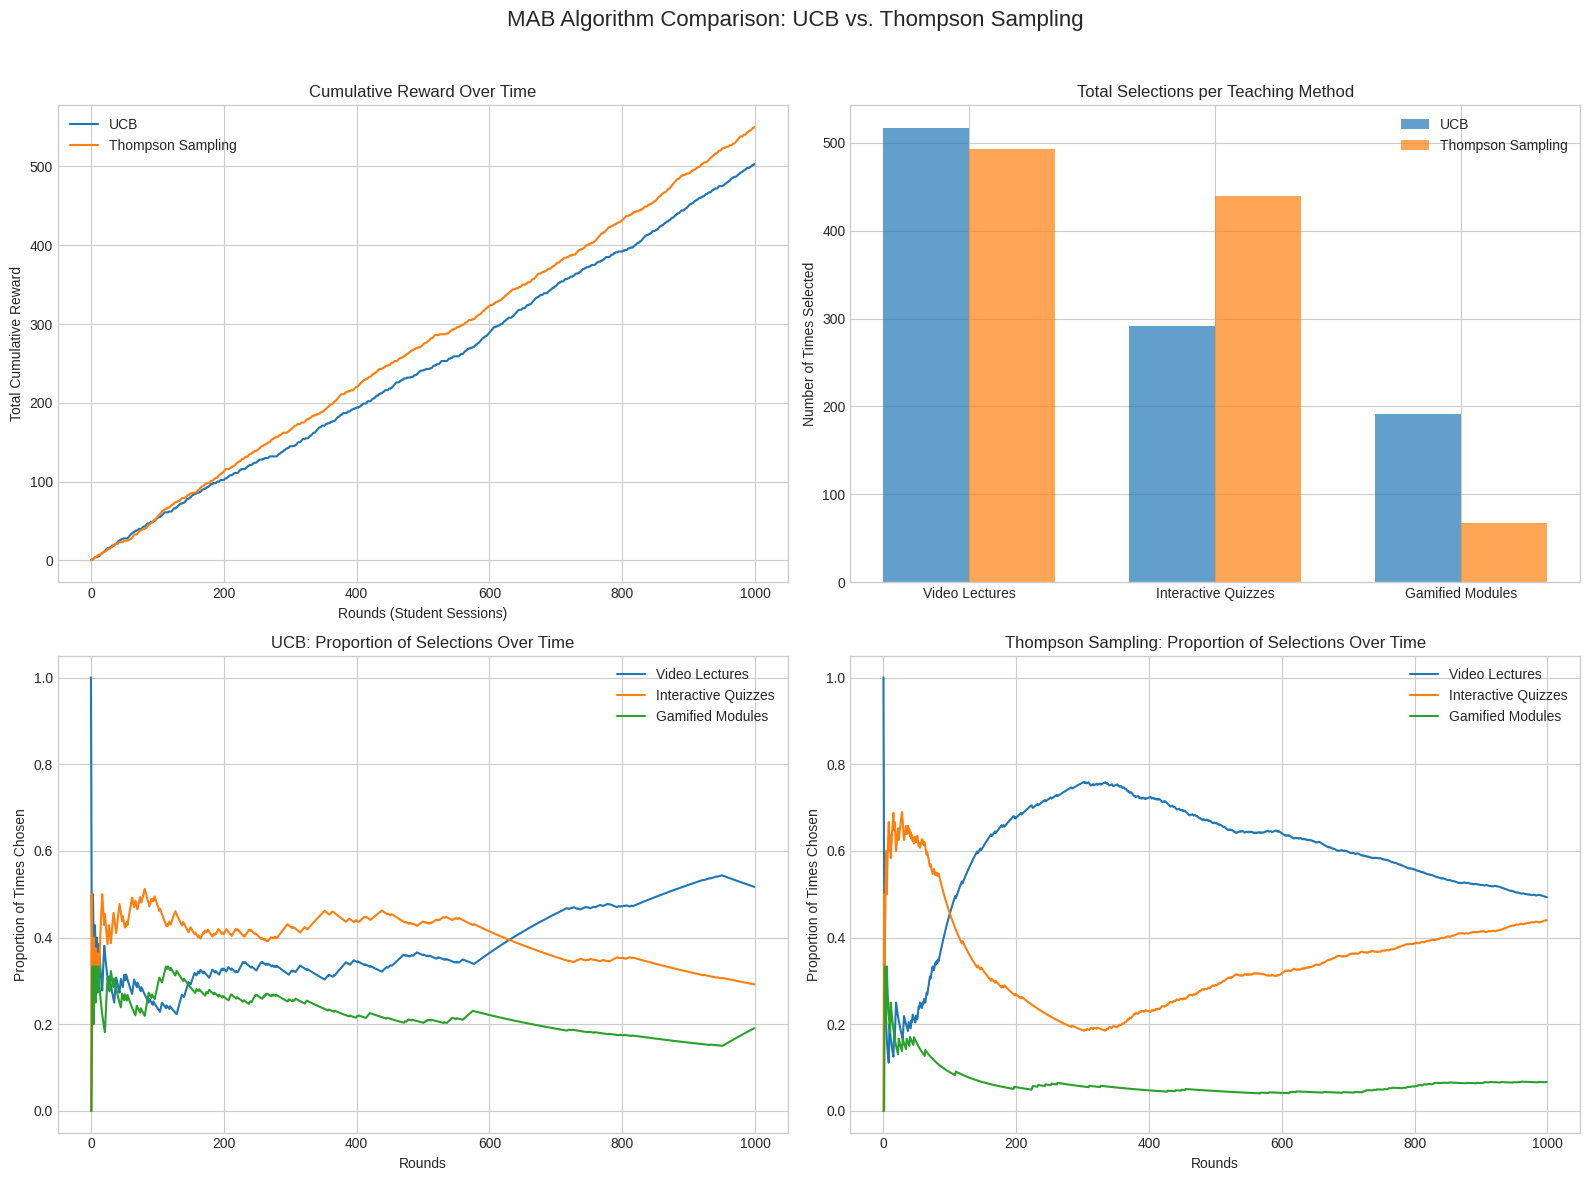

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N_ROUNDS = 1000
PROBS = [0.5, 0.5, 0.5]
N_ARMS = len(PROBS)
ARM_NAMES = ["Video Lectures", "Interactive Quizzes", "Gamified Modules"]
SEED = 42

def simulate_bandit(algorithm_name, n_rounds, n_arms, arm_probs, seed=None):
    if seed is not None:
        np.random.seed(seed)

    num_selections = np.zeros(n_arms, dtype=int)
    num_successes = np.zeros(n_arms, dtype=int)
    cumulative_reward = np.zeros(n_rounds)
    arm_choices = []

    for t in range(n_rounds):
        if algorithm_name == 'UCB':
            if t < n_arms:
                chosen_arm = t
            else:
                ucb_scores = np.zeros(n_arms)
                for arm in range(n_arms):
                    if num_selections[arm] > 0:
                        avg_reward = num_successes[arm] / num_selections[arm]
                        exploration_bonus = np.sqrt(2 * np.log(t + 1) / num_selections[arm])
                        ucb_scores[arm] = avg_reward + exploration_bonus
                    else:
                        ucb_scores[arm] = float('inf')
                chosen_arm = np.argmax(ucb_scores)

        elif algorithm_name == 'Thompson':
            samples = [np.random.beta(num_successes[i] + 1, num_selections[i] - num_successes[i] + 1) for i in range(n_arms)]
            chosen_arm = np.argmax(samples)

        arm_choices.append(chosen_arm)
        reward = 1 if np.random.rand() < arm_probs[chosen_arm] else 0
        num_selections[chosen_arm] += 1
        num_successes[chosen_arm] += reward

        if t == 0:
            cumulative_reward[t] = reward
        else:
            cumulative_reward[t] = cumulative_reward[t - 1] + reward

    return num_selections, cumulative_reward, arm_choices

def print_results(algorithm_name, selections, rewards, arm_names):
    print(f"\n--- {algorithm_name} Results ---")
    for i, name in enumerate(arm_names):
        print(f"- {name}: Selected {selections[i]} times")
    print(f"Total Reward: {int(rewards[-1])}")

def plot_results(ucb_data, thompson_data, arm_names, n_rounds):
    ucb_rewards, ucb_selections, ucb_choices = ucb_data
    thompson_rewards, thompson_selections, thompson_choices = thompson_data

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('MAB Algorithm Comparison: UCB vs. Thompson Sampling', fontsize=16)

    axs[0, 0].plot(ucb_rewards, label='UCB')
    axs[0, 0].plot(thompson_rewards, label='Thompson Sampling')
    axs[0, 0].set_title('Cumulative Reward Over Time')
    axs[0, 0].set_xlabel('Rounds (Student Sessions)')
    axs[0, 0].set_ylabel('Total Cumulative Reward')
    axs[0, 0].legend()

    x_pos = np.arange(len(arm_names))
    width = 0.35
    axs[0, 1].bar(x_pos - width/2, ucb_selections, width, alpha=0.7, label='UCB')
    axs[0, 1].bar(x_pos + width/2, thompson_selections, width, alpha=0.7, label='Thompson Sampling')
    axs[0, 1].set_title('Total Selections per Teaching Method')
    axs[0, 1].set_ylabel('Number of Times Selected')
    axs[0, 1].set_xticks(x_pos)
    axs[0, 1].set_xticklabels(arm_names)
    axs[0, 1].legend()

    ucb_proportions = np.array([[ucb_choices[:t+1].count(i) / (t + 1) for i in range(len(arm_names))] for t in range(n_rounds)])
    for i in range(len(arm_names)):
        axs[1, 0].plot(ucb_proportions[:, i], label=arm_names[i])
    axs[1, 0].set_title('UCB: Proportion of Selections Over Time')
    axs[1, 0].set_xlabel('Rounds')
    axs[1, 0].set_ylabel('Proportion of Times Chosen')
    axs[1, 0].legend()

    thompson_proportions = np.array([[thompson_choices[:t+1].count(i) / (t + 1) for i in range(len(arm_names))] for t in range(n_rounds)])
    for i in range(len(arm_names)):
        axs[1, 1].plot(thompson_proportions[:, i], label=arm_names[i])
    axs[1, 1].set_title('Thompson Sampling: Proportion of Selections Over Time')
    axs[1, 1].set_xlabel('Rounds')
    axs[1, 1].set_ylabel('Proportion of Times Chosen')
    axs[1, 1].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

ucb_selections, ucb_rewards, ucb_choices = simulate_bandit('UCB', N_ROUNDS, N_ARMS, PROBS, seed=SEED)
thompson_selections, thompson_rewards, thompson_choices = simulate_bandit('Thompson', N_ROUNDS, N_ARMS, PROBS, seed=SEED)

print(f"--- Algorithm Results after {N_ROUNDS} Rounds (All Arms p=0.5) ---")
print_results("Upper Confidence Bound (UCB)", ucb_selections, ucb_rewards, ARM_NAMES)
print_results("Thompson Sampling", thompson_selections, thompson_rewards, ARM_NAMES)

ucb_data = (ucb_rewards, ucb_selections, ucb_choices)
thompson_data = (thompson_rewards, thompson_selections, thompson_choices)
print()

plot_results(ucb_data, thompson_data, ARM_NAMES, N_ROUNDS)